In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.io import imread, imsave

# img = img_as_float(astronaut()[::2, ::2])

# path_image='/Users/santiago1/tensorflow_datasets/downloads/images/'
# path_GT='/Users/santiago1/tensorflow_datasets/downloads/annotations/trimaps/'
path_image = ''
path_GT = ''
#imagename='Abyssinian_1'
imagename='Abyssinian_1'
# imagename='chihuahua_100'
img= img_as_float(imread(path_image+imagename+'.jpg')/255)

imgGT=img_as_float(imread(path_GT+imagename+'.jpg'))*255
#plt.figure(figsize=(12,12))
#plt.imshow(imgGT)
#plt.show()

print(np.unique(imgGT))

#GT=imread(path_GT+'Abyssinian_1.jpg')
#segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments = slic(img, n_segments=300, compactness=50, sigma=1)
#segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
#gradient = sobel(rgb2gray(img))
#segments_watershed = watershed(gradient, markers=400, compactness=0.01)

#fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

#ax[0, 0].imshow(mark_boundaries(img, segments_fz))
#ax[0, 0].set_title("Felzenszwalbs's method")
#ax[0, 1].imshow(mark_boundaries(img, segments_slic))
#ax[0, 1].set_title('SLIC')
#ax[1, 0].imshow(mark_boundaries(img, segments_quick))
#ax[1, 0].set_title('Quickshift')
#plt.set_title('Compact watershed')

#for a in ax.ravel():
#    a.set_axis_off()
#
#plt.tight_layout()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

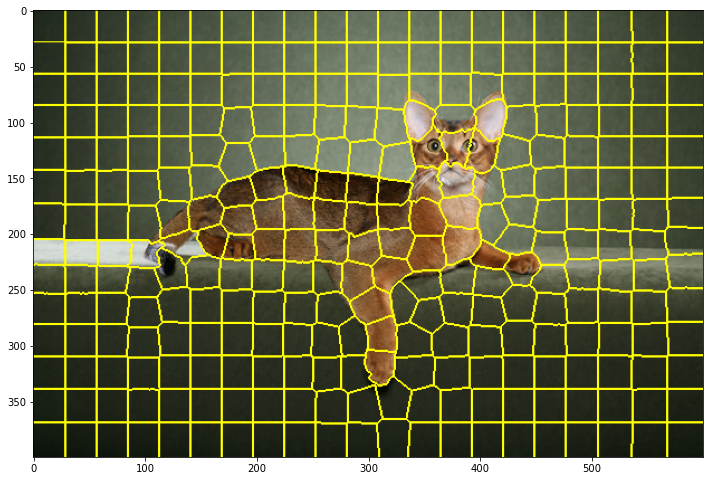

In [2]:
plt.figure(figsize=(12,12))
plt.imshow(mark_boundaries(img, segments))
plt.show()

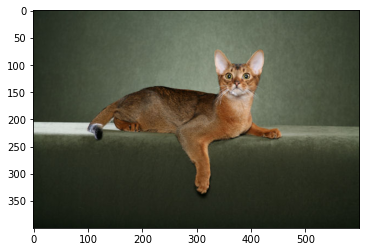

In [3]:
import math
from skimage.measure import label, regionprops
from skimage.transform import resize

regions = regionprops(segments+1)

#plt.figure(figsize=(12,12))
#Z=mark_boundaries(img, segments_watershed,mode='subpixel')
#Z=img

plt.imshow(img)
Listimage=[]
Listgt=[]
sw=12
for props in regions:
    toresize=0
    #x0, y0 = props.centroid
    (min_row, min_col, max_row, max_col)=props.bbox
    #plt.plot(y0, x0, '.g', markersize=15)
    #x0=int(x0)
    #y0=int(y0)
    linf=max(0,(min_row-sw))
    lsup=min(img.shape[0],(max_row+sw))
    linf2=max(0,(min_col-sw))
    lsup2=min(img.shape[1],(max_col+sw))
    IT=img[linf:lsup, linf2:lsup2,:]
    GT=imgGT[linf:lsup, linf2:lsup2]
    Listimage.append(IT)
    Listgt.append(GT)



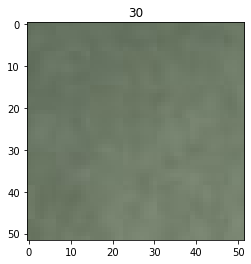

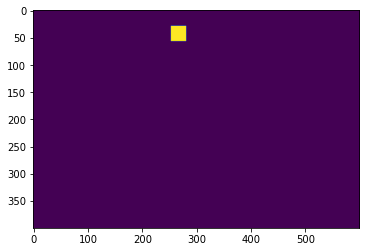

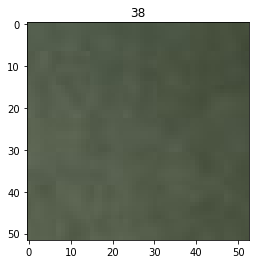

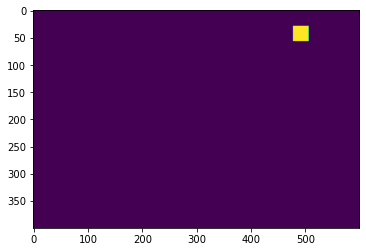

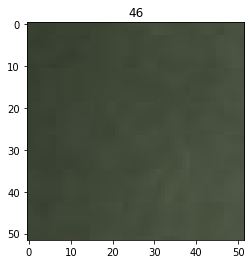

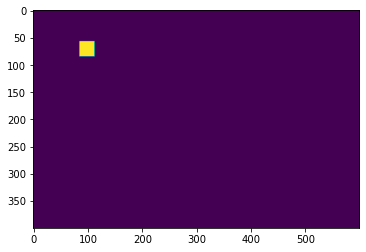

In [5]:
for i in range(30,50,8):
    plt.imshow(Listimage[i])
    plt.title(i)
    plt.show()
    plt.imshow(segments==i)
    plt.show()
    #plt.imshow(Listgt[i])
    #plt.show()

In [6]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions

#model = VGG16(weights='imagenet')
model_fea=VGG16(weights='imagenet', include_top=False)


Using TensorFlow backend.


In [7]:
print('Number of Superpixels')
len(Listimage)

Number of Superpixels


294

In [17]:
featuresout=[]
for i in range(len(Listimage)):
    #print(i)
    img = resize(Listimage[i]*255,(224,224),anti_aliasing=True)
#     img = resize(Listimage[i],(224,224),anti_aliasing=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #preds=model.predict(x)
    #print('Predicted:', decode_predictions(preds, top=3)[0])
    featuresout.append(np.sum(np.sum(np.sum(model_fea.predict(x),axis=2),axis=1),axis=0))

In [12]:
print('Data to compute similarity')
np.array(featuresout).shape

Data to compute similarity


(294, 512)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [18]:
D=-cosine_similarity(np.array(featuresout),np.array(featuresout))
#D=euclidean_distances(np.array(featuresout),np.array(featuresout))

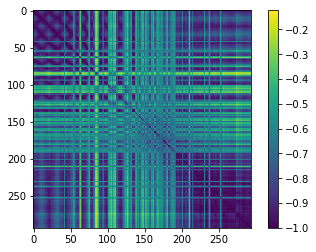

In [22]:
plt.imshow(D)
plt.colorbar()

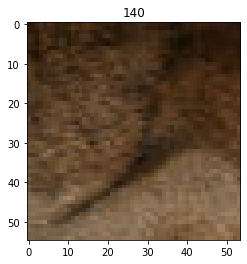

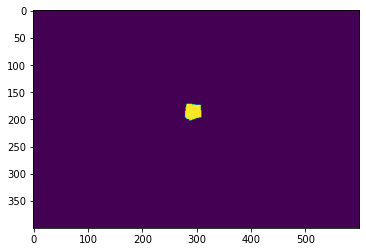

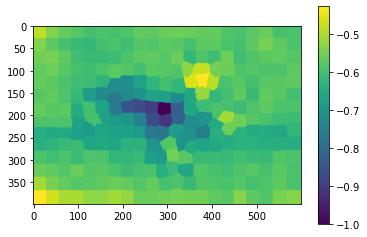

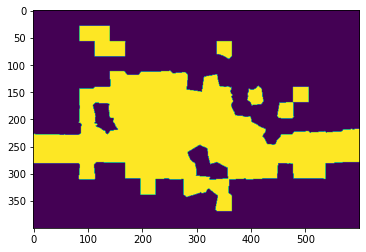

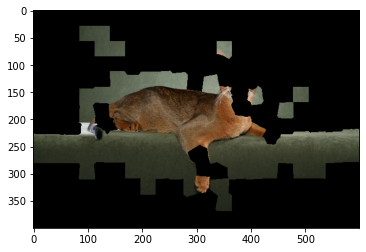

In [21]:
img= img_as_float(imread(path_image+imagename+'.jpg')/255)
reg=140
number_of_regions=100
plt.imshow(Listimage[reg])
plt.title(reg)
plt.show()
plt.imshow(segments==reg)
plt.show()
plt.imshow(D[:,reg][segments])
plt.colorbar()
plt.show()
th=np.sort(D[:,reg])
plt.imshow(D[:,reg][segments]<th[number_of_regions])
plt.show()
plt.imshow(np.multiply(img,np.repeat(np.expand_dims((D[:,reg][segments]<th[number_of_regions]),axis=2),3,axis=2)))
plt.show()